In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
plt.style.use('default')
plt.rc('font', size=18)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [12]:
dataToPlot = ['cpuUsage', 'memoryUsage']
folders = ['3600s']

In [13]:
hardware = '8CPU_20RAM'

In [4]:
#hardware = '12CPU_30RAM'

In [5]:
#tests = ['2repl', '4repl', '5repl', '6repl']

In [14]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [109]:
#tests = ['req_250ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [123]:
#tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

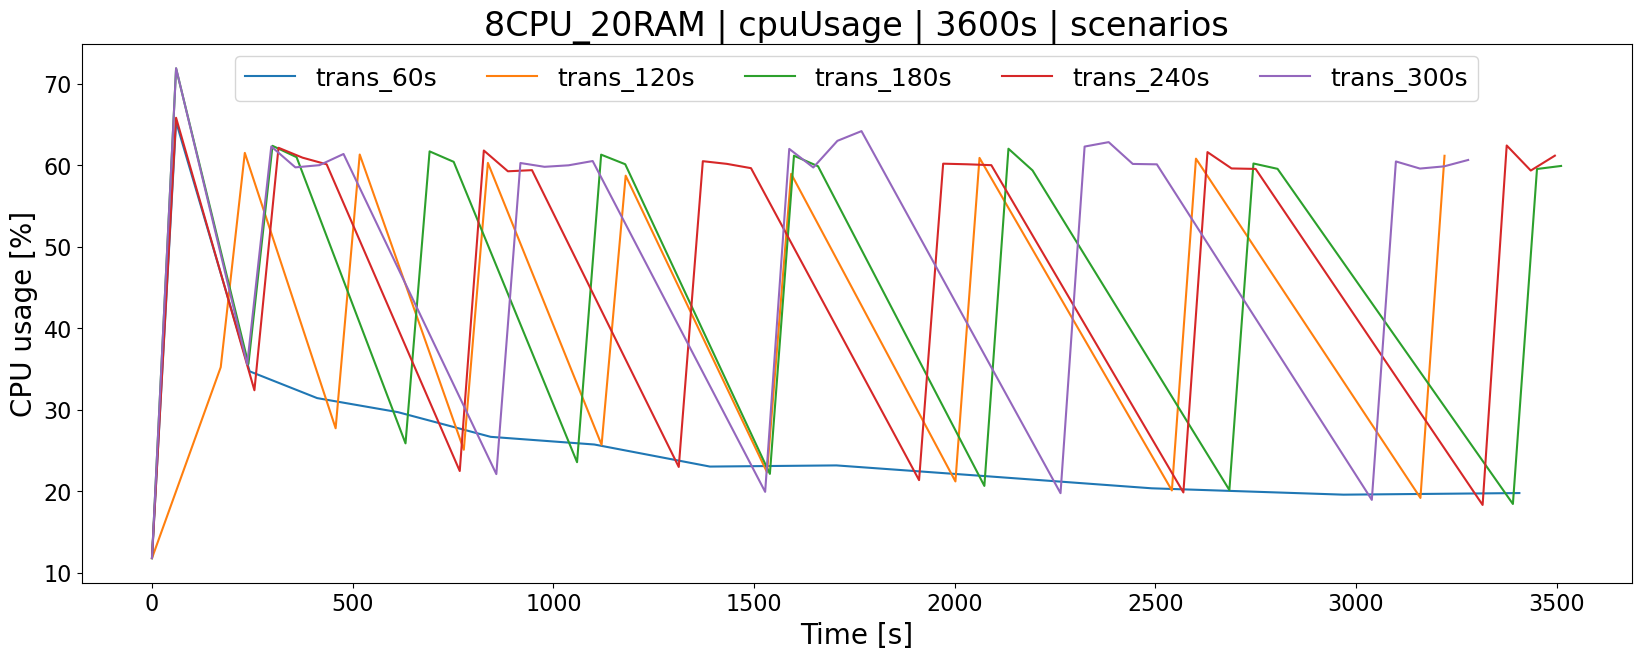

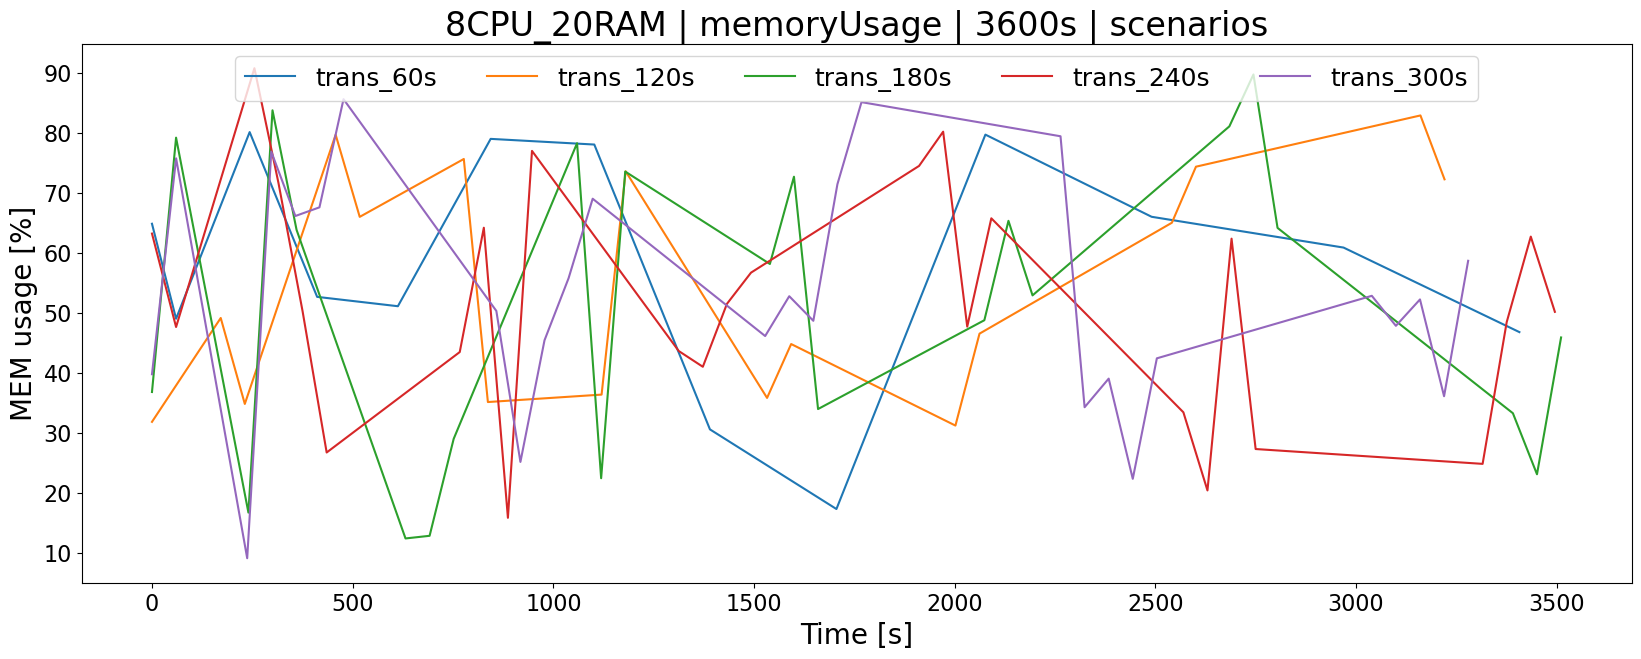

In [35]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                d = pd.read_csv(hardware + '/' + f + '/' + i + '/traffic.csv', usecols=['timestamp', j])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['timestamp'] = d['timestamp'].apply(lambda x: (x - t)/1000)
            d[j] = d[j].apply(lambda x: x*100)

            customDataFrame = pd.DataFrame({'timestamp': d['timestamp'], i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['timestamp'] < int(f[:-1])]
            
            data = pd.concat([data, customDataFrame])
        ax = data.set_index('timestamp').plot(figsize=(20, 7), title = hardware + ' | ' + j + ' | ' + f + ' | ' + 'scenarios')
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("CPU usage [%]") if j == "cpuUsage" else ax.set_ylabel("MEM usage [%]")

        #plt.legend(loc='best')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
                  ncol=5)
